##**Install Necessary Packages**

In [ ]:
!pip install pymupdf #requests beautifulsoup4 nltk sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 56.9 MB/s eta 0:00:00


In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install nltk

In [ ]:
!pip install rake_nltk

##**1. Define functions that extract text from PDF and Webpage**

In [ ]:
import fitz

def extract_text_from_pdf(pdf_path):
    '''
    Extracts text from a PDF file.

    Parameters:
    pdf_path (str): Path to the PDF file.

    Returns:
    str: Extracted text from the PDF.
    '''
    # Open the PDF file
    document = fitz.open(pdf_path)

    # Initialize an empty string to accumulate text
    text = ""

    # Loop through each page number in the document
    for page_num in range(document.page_count):

        # Load the page and extract text
        page = document.load_page(page_num)

        # Extract text from the page and append it to the text string
        text += page.get_text()

    return text


In [ ]:
import requests
from bs4 import BeautifulSoup

def extract_text_from_webpage(url):
    '''
    Extracts text from a web page.

    Parameters:
    url (str): URL of the web page.

    Returns:
    str: Extracted text from the web page.
    '''

    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the response
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract the text from the HTML content
    text = soup.get_text()

    return text


##**2. Define a function that preprocesses the extracted text**


*   Tokenize, remove stop words, remove punctuation, and store them as a list
*   Part of Speech (PoS) tagging



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    '''
    Preprocesses the extracted text.

    Parameters:
    text (str): Extracted text.

    Returns:
    list: Preprocessed text.
    '''

    # Tokenize text
    words = word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))

    # Remove punctuation
    words = [word for word in words if word.isalnum() and word not in stop_words]

    # Join words back into a string
    # word_string = ' '.join(words)

    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_nouns_and_adjectives(text_list):
    '''
    Extracts nouns and adjectives from a text.

    Parameters:
    text (str): Extracted text.

    Returns:
    list: List of extracted nouns and adjectives.
    '''
    # Join the list of words into a single string
    text = ' '.join(text_list)

    # Process the text using spaCy
    doc = nlp(text)

    # Extract nouns and adjectives
    return [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ']]

In [ ]:
def unique_nouns_and_adjectives(text_list):
    '''
    Extracts unique nouns and adjectives from a list of text.

    Parameters:
    list of text (list): List of extracted text.

    Returns:
    list: List of extracted unique nouns and adjectives.
    '''

    # Initialize an empty dictionary to store unique nouns and adjectives
    unique_nouns_and_adjectives = {}

    # Loop through each text
    for word in text_list:
      if word in unique_nouns_and_adjectives:
        unique_nouns_and_adjectives[word] += 1
      else:
        unique_nouns_and_adjectives[word] = 1

    unique_nouns_and_adjectives = [word for word in unique_nouns_and_adjectives if unique_nouns_and_adjectives[word] == 1]

    return unique_nouns_and_adjectives

##**3. Define TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer to extract keywords**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def extract_top_keywords(texts, top_n=30):
    '''
    Extracts top keywords from a list of texts.

    Parameters:
    texts (list): List of texts.
    top_n (int): Number of top keywords to extract.

    Returns:
    list: List of top keywords.
    '''

    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Transform texts into TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Sum TF-IDF scores for each term across all documents
    tfidf_scores = np.sum(tfidf_matrix.toarray(), axis=0)

    # Get indices of top keywords
    top_indices = np.argsort(tfidf_scores)[::-1][:top_n]

    # Get top keywords
    top_keywords = [feature_names[index] for index in top_indices]

    return top_keywords

##**Combine the preprocessed text chain**

In [ ]:
# TEST
# whatIsPitUN_text = extract_text_from_pdf('/content/drive/MyDrive/CFA/PIT-UN Project/PIT_UN_2Pager_2023.pdf')
# whatIsPitUN_preprocessed = preprocess_text(whatIsPitUN_text)
# whatIsPitUN_nouns = extract_nouns_and_adjectives(whatIsPitUN_preprocessed)
# keywords = extract_top_keywords(whatIsPitUN_nouns, 10)



In [ ]:
# custom_stop_words = ['public', 'interest', 'technology', 'pit', 'un']

whatIsPitUN_text = extract_text_from_pdf('/content/drive/MyDrive/CFA/PIT-UN Project/PIT_UN_2Pager_2023.pdf')
whatIsPitUN_preprocessed = preprocess_text(whatIsPitUN_text)
whatIsPitUN_nouns = extract_nouns_and_adjectives(whatIsPitUN_preprocessed)
whatIsPitUN_unique = unique_nouns_and_adjectives(whatIsPitUN_nouns)

whatIsPit_text = extract_text_from_pdf('/content/drive/MyDrive/CFA/PIT-UN Project/002_What-is-PIT_.pdf')
whatIsPit_preprocessed = preprocess_text(whatIsPit_text)
whatIsPit_nouns = extract_nouns_and_adjectives(whatIsPit_preprocessed)
whatIsPit_unique = unique_nouns_and_adjectives(whatIsPit_nouns)

PITAbout_text = extract_text_from_webpage('https://pitcases.org/about-us/')
PITAbout_preprocessed = preprocess_text(PITAbout_text)
PITAbout_nouns = extract_nouns_and_adjectives(PITAbout_preprocessed)
PITAbout_unique = unique_nouns_and_adjectives(PITAbout_nouns)

###**Add Description of 3 books that can be used as proxies for PIT-related publication**

* “Black Software”: The Internet & Racial Justice - Charlton McIlwain (PB001)
* Ethical Data Science: Prediction in the Public Interest - Anne Washington (PB002)
* Privacy, big data, and the public good: Frameworks for engagement - Julia Lane (PB003)

In [ ]:
pb001_text = 'Black Software, for the first time, chronicles the long relationship between African Americans, computing technology, and the Internet. Through new archival sources and the voices of many of those who lived and made this history, this book centralizes African Americans role in the Internets creation and evolution, illuminating both the limits and possibilities for using digital technology to push for racial justice in the United States and across the globe'
pb002_text = 'Can data science truly serve the public interest? Data-driven analysis shapes many interpersonal, consumer, and cultural experiences yet scientific solutions to social problems routinely stumble. All too often, predictions remain solely a technocratic instrument that sets financial interests against service to humanity. Amidst a growing movement to use science for positive change, Anne L. Washington offers a solution-oriented approach to the ethical challenges of data science.Ethical Data Science empowers those striving to create predictive data technologies that benefit more people. As one of the first books on public interest technology, it provides a starting point for anyone who wants human values to counterbalance the institutional incentives that drive computational prediction. It argues that data science prediction embeds administrative preferences that often ignore the disenfranchised. The book introduces the prediction supply chain to highlight moral questions alongside the interlocking legal and commercial interests influencing data science. Structured around a typical data science workflow, the book systematically outlines the potential for more nuanced approaches to transforming data into meaningful patterns. Drawing on arts and humanities methods, it encourages readers to think critically about the full human potential of data science step-by-step. Situating data science within multiple layers of effort exposes dependencies while also pinpointing opportunities for research ethics and policy interventions.This approachable process lays the foundation for broader conversations with a wide range of audiences. Practitioners, academics, students, policy makers, and legislators can all learn how to identify social dynamics in data trends, reflect on ethical questions, and deliberate over solutions. The book proves the limits of predictive technology controlled by the few and calls for more inclusive data science.'
pb003_text = '''Massive amounts of data on human beings can now be analyzed. Pragmatic purposes abound, including selling goods and services, winning political campaigns, and identifying possible terrorists. Yet "big data" can also be harnessed to serve the public good: scientists can use big data to do research that improves the lives of human beings, improves government services, and reduces taxpayer costs. In order to achieve this goal, researchers must have access to this data - raising important privacy questions. What are the ethical and legal requirements? What are the rules of engagement? What are the best ways to provide access while also protecting confidentiality? Are there reasonable mechanisms to compensate citizens for privacy loss? The goal of this book is to answer some of these questions. The book's authors paint an intellectual landscape that includes legal, economic, and statistical frameworks. The authors also identify new practical approaches that simultaneously maximize the utility of data access while minimizing information risk'''

pb001_preprocessed = preprocess_text(pb001_text)
pb002_preprocessed = preprocess_text(pb002_text)
pb003_preprocessed = preprocess_text(pb003_text)

pb001_nouns = extract_nouns_and_adjectives(pb001_preprocessed)
pb002_nouns = extract_nouns_and_adjectives(pb002_preprocessed)
pb003_nouns = extract_nouns_and_adjectives(pb003_preprocessed)

pb001_unique = unique_nouns_and_adjectives(pb001_nouns)
pb002_unique = unique_nouns_and_adjectives(pb002_nouns)
pb003_unique = unique_nouns_and_adjectives(pb003_nouns)

In [ ]:
# Combine texts for TF-IDF
pit_combined = [
    ' '.join(whatIsPitUN_unique),
    ' '.join(whatIsPit_unique),
    ' '.join(PITAbout_unique),
    ' '.join(pb001_unique),
    ' '.join(pb002_unique),
    ' '.join(pb003_unique)
    ]

##**Update Keywords with Additional Text Chain**

In [ ]:
pit_keywords = extract_top_keywords(pit_combined, top_n=20)
pit_keywords.append('technology')
pit_keywords.append('public interest')
pit_keywords

['new',
 'research',
 'limit',
 'many',
 'first',
 'book',
 'justice',
 'digital',
 'software',
 'approach',
 'relationship',
 'evolution',
 'role',
 'government',
 'political',
 'ethical',
 'economic',
 'framework',
 'possible',
 'time',
 'technology',
 'public interest']

##**Test Case for Similarity Scoring (Keep Collapsed)**

In [ ]:
import pandas as pd

# df = pd.read_csv('/content/drive/MyDrive/CFA/PIT-UN Project/Tester [PIT-UN] Publications by Alliance Associates - Sheet1.csv')

In [ ]:
# df_preprocessed = preprocess_text(df.loc[2, 'Description'])
# df_nouns = extract_nouns_and_adjectives(df_preprocessed)
# df_uniques = unique_nouns_and_adjectives(df_nouns)

In [ ]:
# score = 0
# for word in df_uniques:
#   if word in pit_keywords:
#     score += 1
# score

##**Create a PIT-Scoring Function**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def cosine_similarity_scoring(text_string, keywords):
    '''
    Take any book description and score calculate its PIT-compatibility score based on cosine similarity.

    Parameters:
    text (str): Extracted text of book description.
    keywords (list): List of keywords from TF-IDF.

    Returns:
    int: PIT-compatibility score.
    '''
    # Handle potential missing or invalid URLs
    if not isinstance(text_string, str):
        print(f"Missing Description") # Print a warning for missing description
        return 0  # Or handle it in a way that makes sense for your application

    # Preprocess text
    text_preprocessed = preprocess_text(text_string)

    # Combine text for TF-IDF
    documents = [' '.join(text_preprocessed), ' '.join(keywords)]

    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Transform texts into TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

    # Get similarity score
    score = cosine_sim[0][0] * 1000

    # return score
    return score


##**Import Data and Add Compatibility Score**

In [ ]:
import pandas as pd

# import csv or excel file of publications
df = pd.read_csv('/content/drive/MyDrive/CFA/PIT-UN Project/[PIT-UN] Publications by Alliance Associates - Sheet1.csv').drop(columns=['PIT-related?'])

###Use This Block to Enter New Record

In [ ]:
new_row = {
    'Book Title': '',
    'Book Author(s)': 'New Author',
    'Description Link': '',
    'Desc. Full': '',
    'Physical Copy Availability': True '''False if unavailable''',
    'Digital Copy Availability': True '''False if unavailable''',
    'Notes': ''
    }
df = df.append(new_row, ignore_index=True)


###Compatibility Scoring and Visualizing Distribution

In [ ]:
# iterate through each record to add the Compatibility Score using the cosine similarity scoring function
for index, row in df.iterrows():
  df.loc[index, 'Compatibility Score'] = cosine_similarity_scoring(row['Desc. Full'], pit_keywords)

Missing Description
Missing Description
Missing Description
Missing Description
Missing Description
Missing Description
Missing Description
Missing Description


In [ ]:
df = df.sort_values(by='Compatibility Score', ascending = False).reset_index(drop=True)

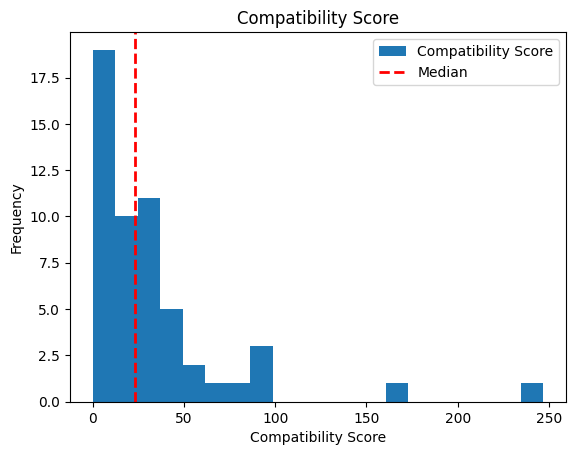

Median Compatibility Score: 23.3716

These are the books that have non-zero values for their PIT compatibility scores:

Book Title                                                                                                                        Score 

0. “Black Software”: The Internet & Racial Justice                                                                                246.95
Measuring the Economic Value of Research: The Case of Food Safety                                                                 163.36
0.Privacy, big data, and the public good: Frameworks for engagement                                                               96.90 
Artificial Unintelligence: How Computers Misunderstand the World                                                                  93.21 
0. Ethical Data Science: Prediction in the Public Interest                                                                        87.31 
Black Celebrity, Racial Politics, and the Press: Framing 

In [ ]:
# @title Compatibility Score

from matplotlib import pyplot as plt

# plot the Compatibility Score
df['Compatibility Score'].plot(kind='hist', bins=20, title='Compatibility Score')

# draw a vertical line at the median value
plt.axvline(df['Compatibility Score'].median(), color='red', linestyle='dashed', linewidth=2, label="Median")

plt.legend()
plt.xlabel('Compatibility Score')

plt.show()

median_score = df['Compatibility Score'].median()

print(f"Median Compatibility Score: {median_score:.4f}\n")
print(f"These are the books that have non-zero values for their PIT compatibility scores:\n")
print(f"{'Book Title':<130s}{'Score':<6s}\n")
pit_compatible = []
for index, row in df.iterrows():
  if row['Compatibility Score'] >= median_score:
    print(f"{row['Book Title']:<130s}{row['Compatibility Score']:<6.2f}")
    pit_compatible.append(row['Book Title'])

In [ ]:
for index, row in df.iterrows():
    if row['Book Title'] in pit_compatible:
        df.loc[index, 'PIT-related'] = True
    else:
        df.loc[index, 'PIT-related'] = False

In [ ]:
df

,Book Title,Book Author(s),Description Link,Desc. Full,Year of Publication,ISBN Number (if available),Physical Copy Availability,Digital Copy Availability,Notes,Compatibility Score,PIT-related
0,0. “Black Software”: The Internet & Racial Jus...,Charlton McIlwain,https://search.library.nyu.edu/discovery/fulld...,"Black Software, for the first time, chronicles...",2017,NaN,True,True,Physical copy available at NYU Dibner Library ...,246.950673,True
1,Measuring the Economic Value of Research: The ...,"Julia Ingrid Lane (Editor), Kaye Husbands-Feal...",https://search.library.nyu.edu/discovery/fulld...,\nThe scientific advances that underpin econom...,2017,NaN,False,True,Online version can be downloaded and accessed ...,163.362481,True
2,"0.Privacy, big data, and the public good: Fram...","Julia Lane, Victoria Stodden, Stefan Bender, H...",https://search.library.nyu.edu/discovery/fulld...,Massive amounts of data on human beings can no...,2013,9781107590205\n9781107067356,True,True,Physical copy available at NYU Bobst Library M...,96.904974,True
3,Artificial Unintelligence: How Computers Misun...,Meredith Broussard\n,https://search.library.nyu.edu/discovery/fulld...,"In this book, the author argues that our colle...",2018,0262038005\n9780262038003,True,True,Physical copy available at NYU Bobst Library M...,93.205229,True
4,0. Ethical Data Science: Prediction in the Pub...,Anne L. Washington\r,https://search.library.nyu.edu/discovery/fulld...,Can data science truly serve the public intere...,2023,9780197693025,True,True,Physical copy available at NYU Bobst Offsite M...,87.306459,True
5,"Black Celebrity, Racial Politics, and the Pres...","Sarah J. Jackson, Charlton McIlwain (Editor), ...",https://search.library.nyu.edu/discovery/fulld...,Shifting understandings and ongoing conversati...,2013,NaN,False,True,Online version can be downloaded and accessed ...,81.581385,True
6,The Routledge companion to digital journalism ...,"Bob Franklin (Editor), Scott A Eldridge (Edito...",https://search.library.nyu.edu/discovery/fulld...,The Routledge Companion to Digital Journalism ...,2017,9781138887961\n113888796X\n9781315713793,True,True,Physical copy available at NYU Bobst Library M...,71.220629,True
7,"When Death Goes Pop: Death, Media and the Rema...",Charlton D McIlwain,https://search.library.nyu.edu/discovery/fulld...,"In When Death Goes Pop, Charlton D. Mellwain d...",2005,0820470643\n9780820470641,True,False,Physical copy available at NYU Bobst Library M...,57.383716,True
8,Silencing the Self Across Cultures: Depression...,"Dana C. Jack, Alisha Ali\n",https://search.library.nyu.edu/discovery/fulld...,\nThis international volume offers new perspec...,2010,9780199776900\n9780195398090,True,True,Physical copy available at NYU Bobst Library M...,49.571727,True
9,The Multimodal Learning Analytics Handbook,"Michail Giannakos, Daniel Spikol, Daniele Di M...",https://search.library.nyu.edu/discovery/fulld...,\nThis handbook is the first book ever coverin...,2022,9783031080760\n9783031080753,False,True,Online version can be downloaded and accessed ...,49.280352,True


In [ ]:
df.to_excel('/content/drive/MyDrive/CFA/PIT-UN Project/PIT Updated Database.xlsx')